<a href="https://colab.research.google.com/github/Daivar/Deep_Learning_Models/blob/main/Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

# Fastai is a library biult on another library that is biult on many others
# ... it's no wonder that there are warnings being displayed (deprecation, change of ussage, etc.)
# ... we can ignore them like that 
import warnings
warnings.filterwarnings('ignore')

In [2]:
!rm -rf datasets/ pneumonia/ test/ val/

# create a varible that will hold a string representing the local path in my file system
local_path='datasets/pneumonia'
remote_path='https://github.com/MindaugasBernatavicius/DeepLearningCourse/raw/master/07_Computer_Vision_Image_Classification/datasets/pneumonia/'

# Test and validation data, in bash you need to specify a dolar sign before calling a variable
!wget -nv --directory-prefix=$local_path $remote_path/test.zip
!wget -nv --directory-prefix=$local_path $remote_path/val.zip

2022-01-01 16:38:09 URL:https://raw.githubusercontent.com/MindaugasBernatavicius/DeepLearningCourse/master/07_Computer_Vision_Image_Classification/datasets/pneumonia/test.zip [77299946/77299946] -> "datasets/pneumonia/test.zip" [1]
2022-01-01 16:38:10 URL:https://raw.githubusercontent.com/MindaugasBernatavicius/DeepLearningCourse/master/07_Computer_Vision_Image_Classification/datasets/pneumonia/val.zip [2940688/2940688] -> "datasets/pneumonia/val.zip" [1]


In [3]:
!printf "aaaa\nbbbb\ncccc\n" | wc -l 

3


In [ ]:
!unzip -q -d 'pneumonia' $local_path/test.zip
!find pneumonia/test/NORMAL/ -type f
!find pneumonia/test/NORMAL/ -type f | wc -l
!find pneumonia/test/PNEUMONIA/ -type f | wc -l

In [5]:
!unzip -q -d 'pneumonia' $local_path/val.zip
!find pneumonia/val/NORMAL/ -type f | wc -l
!find pneumonia/val/PNEUMONIA/ -type f | wc -l

8
8


In [6]:
# Train data
!wget -nv --directory-prefix=$local_path $remote_path/NORMAL_1.zip
!wget -nv --directory-prefix=$local_path $remote_path/NORMAL_2.zip
!wget -nv --directory-prefix=$local_path $remote_path/NORMAL_3.zip
!wget -nv --directory-prefix=$local_path $remote_path/NORMAL_4.zip
!wget -nv --directory-prefix=$local_path $remote_path/NORMAL_5.zip
!wget -nv --directory-prefix=$local_path $remote_path/NORMAL_6.zip
!wget -nv --directory-prefix=$local_path $remote_path/NORMAL_7.zip
!wget -nv --directory-prefix=$local_path $remote_path/NORMAL_8.zip
!wget -nv --directory-prefix=$local_path $remote_path/PNEUMONIA_1.zip
!wget -nv --directory-prefix=$local_path $remote_path/PNEUMONIA_2.zip
!wget -nv --directory-prefix=$local_path $remote_path/PNEUMONIA_3.zip
!wget -nv --directory-prefix=$local_path $remote_path/PNEUMONIA_4.zip

2022-01-01 16:40:01 URL:https://raw.githubusercontent.com/MindaugasBernatavicius/DeepLearningCourse/master/07_Computer_Vision_Image_Classification/datasets/pneumonia/NORMAL_1.zip [101486491/101486491] -> "datasets/pneumonia/NORMAL_1.zip" [1]
2022-01-01 16:40:09 URL:https://raw.githubusercontent.com/MindaugasBernatavicius/DeepLearningCourse/master/07_Computer_Vision_Image_Classification/datasets/pneumonia/NORMAL_2.zip [101565405/101565405] -> "datasets/pneumonia/NORMAL_2.zip" [1]
2022-01-01 16:40:16 URL:https://raw.githubusercontent.com/MindaugasBernatavicius/DeepLearningCourse/master/07_Computer_Vision_Image_Classification/datasets/pneumonia/NORMAL_3.zip [101116801/101116801] -> "datasets/pneumonia/NORMAL_3.zip" [1]
2022-01-01 16:40:23 URL:https://raw.githubusercontent.com/MindaugasBernatavicius/DeepLearningCourse/master/07_Computer_Vision_Image_Classification/datasets/pneumonia/NORMAL_4.zip [101959842/101959842] -> "datasets/pneumonia/NORMAL_4.zip" [1]
2022-01-01 16:40:31 URL:https://

In [7]:
remote_path='datasets/pneumonia'


In [8]:
!mkdir -p pneumonia/train/NORMAL pneumonia/train/PNEUMONIA

!rm -rf pneumonia/train/NORMAL/*

In [10]:
%%bash
local_path='datasets/pneumonia'
dst_path=pneumonia/train/NORMAL
for i in {1..8} 
do
  mv $local_path/NORMAL_${i}.zip $dst_path # NORMAL_1.zip, NORMAL_2.zip ..
  unzip -jq -d $dst_path $dst_path/NORMAL_${i}.zip  
  rm -rf $dst_path/NORMAL_${i}.zip
done
find $dst_path -type f | wc -l

1341


In [9]:
%%bash
local_path='datasets/pneumonia'
dst_path=pneumonia/train/PNEUMONIA
for i in {1..4} 
do
  mv $local_path/PNEUMONIA_${i}.zip $dst_path
  unzip -jq -d $dst_path $dst_path/PNEUMONIA_${i}.zip  
  rm -rf $dst_path/PNEUMONIA_${i}.zip
done
find $dst_path -type f | wc -l

3875


In [10]:
from pathlib import Path
import nvidia_smi

In [11]:
!nvidia-smi

Sat Jan  1 16:42:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    27W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [12]:
# Set path to root directory
path = Path('./pneumonia/')
# View all files in directory
path.ls()

[PosixPath('pneumonia/val'),
 PosixPath('pneumonia/train'),
 PosixPath('pneumonia/test')]

In [13]:
data = ImageDataBunch.from_folder(path, 
            # change the 'train' and 'test', see what happens
            # ... note that pathlib ussually represents paths as strings
            train='train', valid='test', 
            ds_tfms=get_transforms(do_flip=False), 
            size=224, bs=64, num_workers=8)

# If you see a warning, ignore it. More details on it: https://github.com/pytorch/pytorch/issues/37656 

# this is what the train='train' line does
print(data.path/'test')
print(data.valid_ds)

pneumonia/test
LabelList (390 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA
Path: pneumonia


['PNEUMONIA'] 1
3875 390


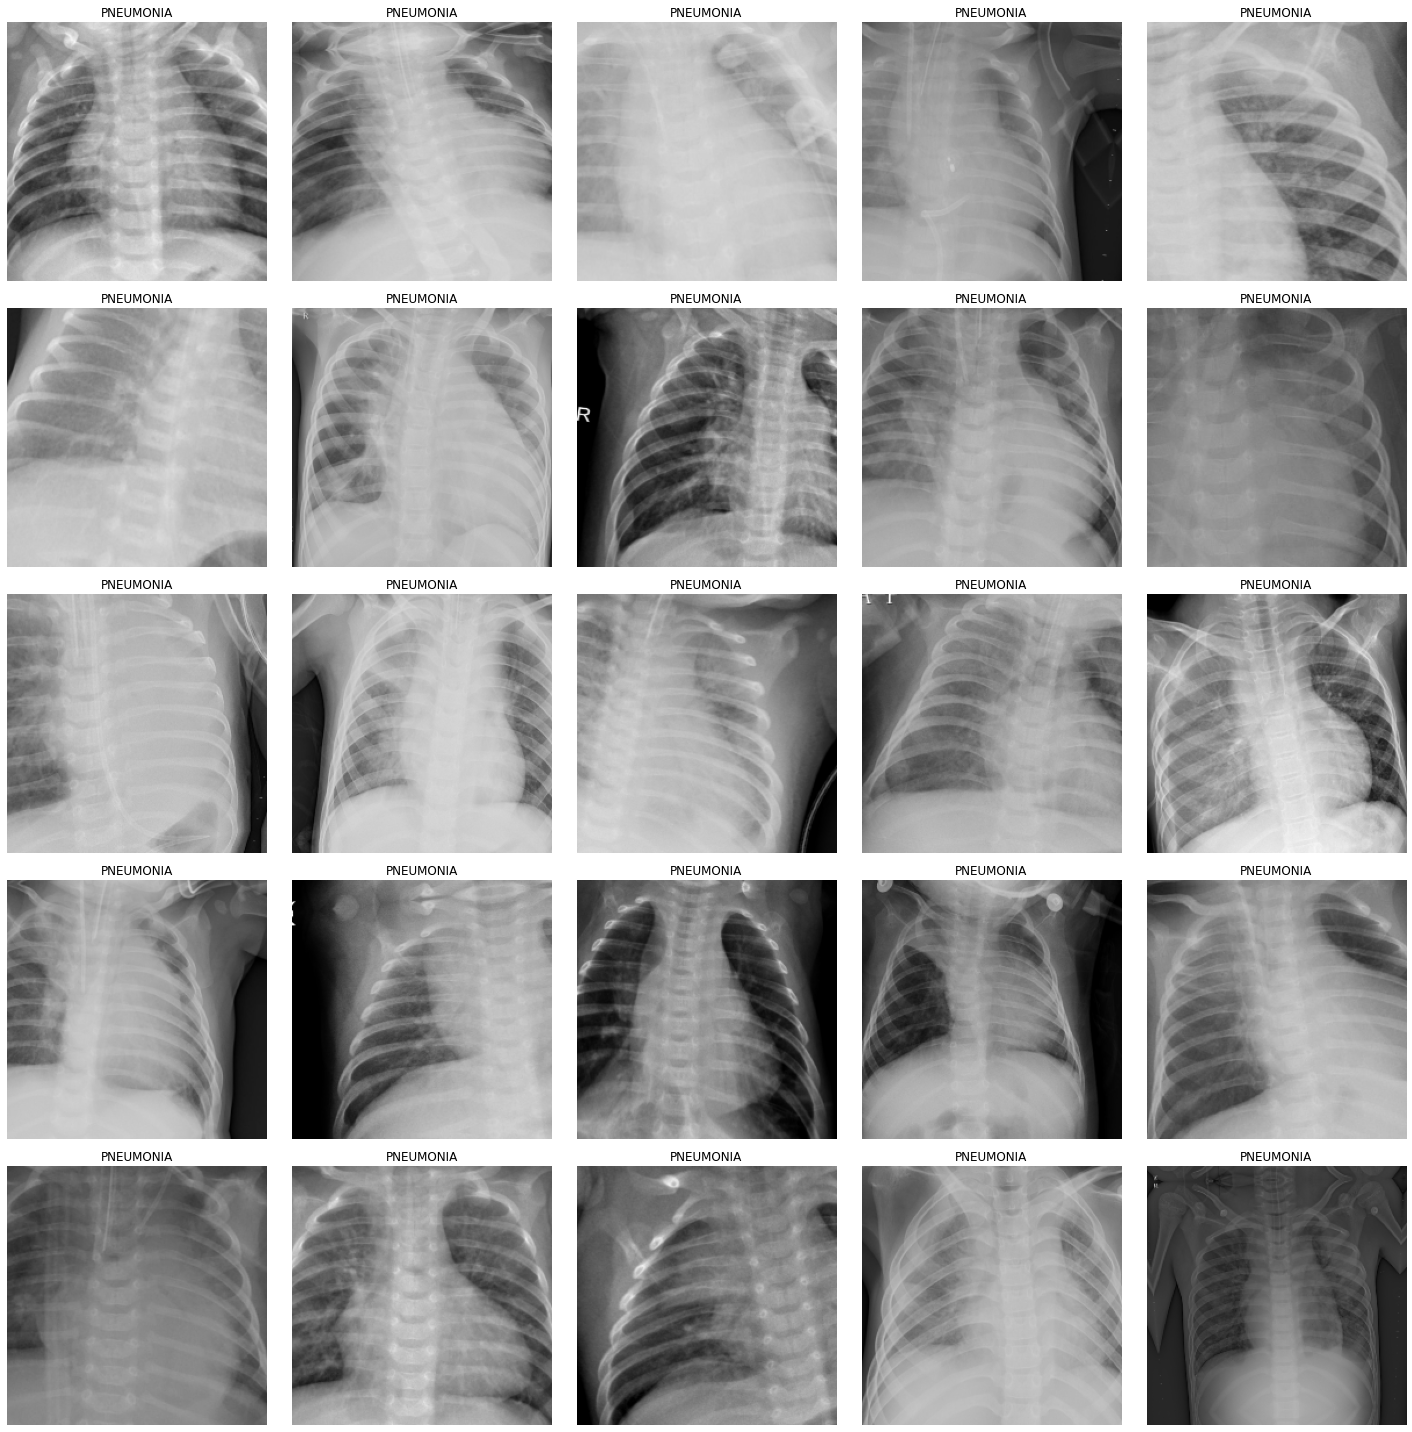

In [14]:
data.show_batch()
# data.show_batch(rows=4, figsize=(10,8))

# See the classes and count of classes in your dataset
print(data.classes, data.c)

# See the number of images in each data set
print(len(data.train_ds), len(data.valid_ds))

In [15]:
!nvidia-smi

Sat Jan  1 16:44:55 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    58W / 149W |    555MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [16]:
learn = cnn_learner(data, models.resnet34, metrics = [accuracy])

# Error rate = 1 - accuracy
# learn = cnn_learner(data, models.resnet34, metrics = [accuracy, error_rate])

kappa = KappaScore()
kappa.weights = "quadratic"
learn = cnn_learner(data, models.resnet34, metrics = [accuracy, error_rate, kappa])

learn

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

Learner(data=ImageDataBunch;

Train: LabelList (3875 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA
Path: pneumonia;

Valid: LabelList (390 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA
Path: pneumonia;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, 

In [ ]:
dir(models)

In [18]:
%%time

# Train the model on 4 epochs of data at the default learning rate
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,error_rate,kappa_score,time
0,0.000000,0.000000,1.000000,0.000000,nan,02:36
1,0.000000,0.000000,1.000000,0.000000,nan,02:34
2,0.000000,0.000000,1.000000,0.000000,nan,02:34


CPU times: user 31.5 s, sys: 5.02 s, total: 36.5 s
Wall time: 7min 45s


In [19]:
# saving model

!ls -alht

total 24K
drwxr-xr-x 5 root root 4.0K Jan  1 16:42 pneumonia
drwxr-xr-x 1 root root 4.0K Jan  1 16:38 .
drwxr-xr-x 3 root root 4.0K Jan  1 16:38 datasets
drwxr-xr-x 1 root root 4.0K Jan  1 16:33 ..
drwxr-xr-x 1 root root 4.0K Dec  3 14:33 sample_data
drwxr-xr-x 4 root root 4.0K Dec  3 14:33 .config


In [20]:
learn.save('./stage-1')
# learn.save('../../stage-1')
# Load the Model
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (3875 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA
Path: pneumonia;

Valid: LabelList (390 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA
Path: pneumonia;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, 

In [21]:
!ls -alht

total 24K
drwxr-xr-x 6 root root 4.0K Jan  1 16:55 pneumonia
drwxr-xr-x 1 root root 4.0K Jan  1 16:38 .
drwxr-xr-x 3 root root 4.0K Jan  1 16:38 datasets
drwxr-xr-x 1 root root 4.0K Jan  1 16:33 ..
drwxr-xr-x 1 root root 4.0K Dec  3 14:33 sample_data
drwxr-xr-x 4 root root 4.0K Dec  3 14:33 .config


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 6.31E-08
CPU times: user 17.1 s, sys: 3.79 s, total: 20.8 s
Wall time: 4min 24s


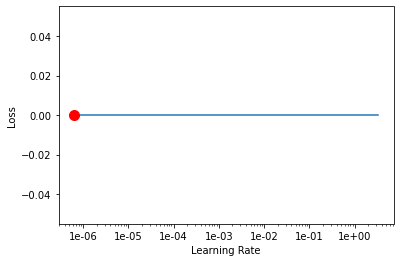

In [23]:
%%time

# Unfreeze all layers of the CNN
learn.unfreeze()

# Find the optimal learning rate range and plot a visual of it
learn.lr_find()

learn.recorder.plot(suggestion=True)

In [24]:
learn.fit_one_cycle(2, max_lr=slice(2.75e-6, 6.31e-8))

epoch,train_loss,valid_loss,accuracy,error_rate,kappa_score,time
0,0.000000,0.000000,1.000000,0.000000,nan,02:37
1,0.000000,0.000000,1.000000,0.000000,nan,02:35


In [40]:
interp.most_confused(min_val=2)

[]

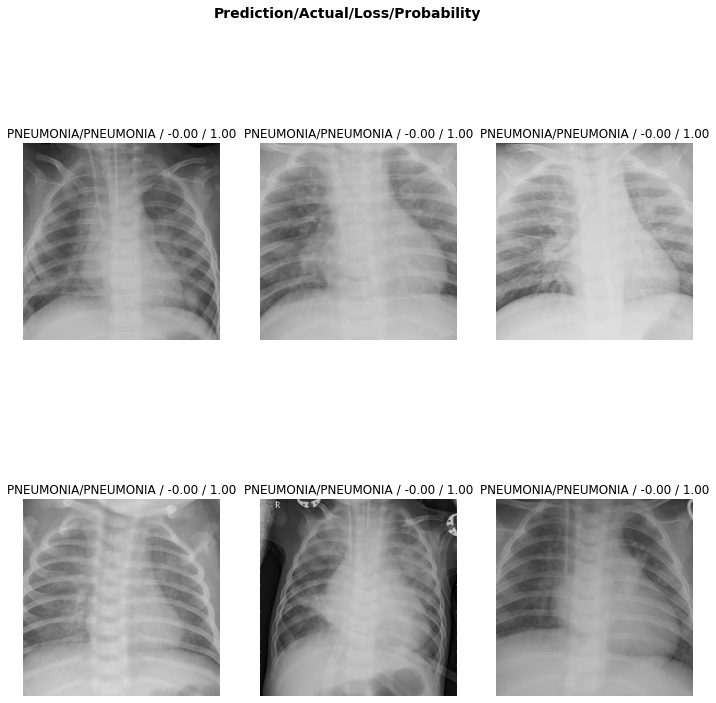

In [41]:
interp.plot_top_losses(6)

In [42]:
!nvidia-smi

Sat Jan  1 17:24:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    61W / 149W |   3660MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------